In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as units
#import seaborn as sns
from scipy.stats import ks_2samp

from BASE9Analysis import readGaiaData
from BASE9Analysis import findSeparation
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


%matplotlib inline

In [83]:
filepath = '/Users/Claire/Documents/Code/current/ANNACRNN/NGC_6819.df'
# data2 = 'M_35.ecsv'

In [84]:
df = pd.read_csv(filepath, ' ')
df

/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_16294/2241682132.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filepath, ' ')


,Unnamed: 0,source_id,ra,dec,pmra,pmdec,radial_velocity,G,phot_g_mean_flux_over_error,G_BP,...,PRV,PPa,PPM,PM_ra,PM_dec,CMprior,member,binary,m1Median,qMedian
0,0,2076299826416438016,295.323348,40.178309,-2.752032,-3.855960,3.261106,9.964309,789.751465,11.636763,...,1.0,1.0,1.0,1.0,1.0,1.00,True,False,1.571696,0.018586
1,1,2076394728016615680,295.479787,40.239351,-2.859465,-3.965298,4.257041,10.090788,1605.064941,11.455871,...,1.0,1.0,1.0,1.0,1.0,1.00,False,False,1.572130,0.029689
2,2,2076582950658667264,295.284268,40.325501,-2.808784,-3.858384,2.089507,10.142780,1728.030518,11.429246,...,1.0,1.0,1.0,1.0,1.0,1.00,True,False,1.598359,0.022048
3,3,2076583534763920896,295.332116,40.393369,-2.914508,-3.941675,1.359580,10.906358,4438.817383,11.769193,...,1.0,1.0,1.0,1.0,1.0,1.00,True,False,1.598426,0.017469
4,4,2076299826420536320,295.321034,40.181053,-2.853334,-3.896847,0.901455,11.078962,4430.854004,11.966545,...,1.0,1.0,1.0,1.0,1.0,1.00,True,False,1.569861,0.051767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2663,2076600783352332544,295.107372,40.541477,-3.001040,-3.682326,NaN,20.678389,122.690918,20.942129,...,0.5,0.5,1.0,1.0,1.0,0.25,False,False,0.591466,0.031841
2664,2664,2076267425181147264,295.421426,39.602528,-2.641961,-4.234599,NaN,20.678520,109.130798,21.030333,...,0.5,0.5,1.0,1.0,1.0,0.25,False,False,0.564534,0.040627
2665,2665,2076228839190638208,295.643009,39.722079,-3.048898,-3.684352,NaN,20.681858,113.092102,21.153708,...,0.5,1.0,1.0,1.0,1.0,0.50,False,False,0.571546,0.058011
2666,2666,2076376792235203712,295.591499,40.086798,-2.661997,-3.708260,NaN,20.684910,141.551834,20.859354,...,0.5,0.5,1.0,1.0,1.0,0.25,False,False,0.562151,0.041114


In [85]:
# #read data from ecsv and round to 4 decimals
# df=readGaiaData('M67data.ecsv')
# df=df.round(4)

In [86]:
# #include only cluster members and nonbinary stars
# singlePhot = phot.loc[(phot['member']) & (phot['binary']== False)]
# singlePhot['binary'].unique() #check all binary columns are false
# # singlePhot

# #include only binary stars
# binaryPhot = phot.loc[phot['binary']]
# binaryPhot['binary'].unique() #check all binary columns are true
# #photBinary

# binaryGaiaData = pd.merge(originalGaia, binaryPhot, on=['G','G_BP'])
# singleGaiaData = pd.merge(originalGaia, singlePhot, on=['G','G_BP'])

In [87]:
# df=pd.read_csv(data, sep=' ')
from astropy import units as u
for i in df:
    c1 = SkyCoord(np.deg2rad(df['ra']),np.deg2rad(df['dec']),unit='rad')
    c2 = SkyCoord(np.deg2rad(295.3250),np.deg2rad(40.19),unit='rad')
    df['distance'] = c1.separation(c2).value
df

,Unnamed: 0,source_id,ra,dec,pmra,pmdec,radial_velocity,G,phot_g_mean_flux_over_error,G_BP,...,PPa,PPM,PM_ra,PM_dec,CMprior,member,binary,m1Median,qMedian,distance
0,0,2076299826416438016,295.323348,40.178309,-2.752032,-3.855960,3.261106,9.964309,789.751465,11.636763,...,1.0,1.0,1.0,1.0,1.00,True,False,1.571696,0.018586,0.011759
1,1,2076394728016615680,295.479787,40.239351,-2.859465,-3.965298,4.257041,10.090788,1605.064941,11.455871,...,1.0,1.0,1.0,1.0,1.00,False,False,1.572130,0.029689,0.128089
2,2,2076582950658667264,295.284268,40.325501,-2.808784,-3.858384,2.089507,10.142780,1728.030518,11.429246,...,1.0,1.0,1.0,1.0,1.00,True,False,1.598359,0.022048,0.139020
3,3,2076583534763920896,295.332116,40.393369,-2.914508,-3.941675,1.359580,10.906358,4438.817383,11.769193,...,1.0,1.0,1.0,1.0,1.00,True,False,1.598426,0.017469,0.203442
4,4,2076299826420536320,295.321034,40.181053,-2.853334,-3.896847,0.901455,11.078962,4430.854004,11.966545,...,1.0,1.0,1.0,1.0,1.00,True,False,1.569861,0.051767,0.009446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2663,2076600783352332544,295.107372,40.541477,-3.001040,-3.682326,NaN,20.678389,122.690918,20.942129,...,0.5,1.0,1.0,1.0,0.25,False,False,0.591466,0.031841,0.388627
2664,2664,2076267425181147264,295.421426,39.602528,-2.641961,-4.234599,NaN,20.678520,109.130798,21.030333,...,0.5,1.0,1.0,1.0,0.25,False,False,0.564534,0.040627,0.592111
2665,2665,2076228839190638208,295.643009,39.722079,-3.048898,-3.684352,NaN,20.681858,113.092102,21.153708,...,1.0,1.0,1.0,1.0,0.50,False,False,0.571546,0.058011,0.527609
2666,2666,2076376792235203712,295.591499,40.086798,-2.661997,-3.708260,NaN,20.684910,141.551834,20.859354,...,0.5,1.0,1.0,1.0,0.25,False,False,0.562151,0.041114,0.228383


In [88]:
originalGaia = pd.read_csv('M67data.ecsv', sep='\s+', skiprows=180)
originalGaia

,source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,...,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error
0,2076238047602280192,294.966500,39.361183,-2.999210,-3.818512,NaN,19.883455,284.23004,20.299744,15.213822,...,0.031497,NaN,NaN,NaN,NaN,NaN,NaN,0.004710,0.071420,0.041885
1,2076248699120608640,294.752671,39.356005,-0.671946,-1.635737,NaN,20.538590,152.52092,21.097216,8.546000,...,0.108386,NaN,NaN,NaN,NaN,NaN,NaN,0.007633,0.127077,0.093990
2,2076253543843879296,294.701165,39.488968,-2.033566,-2.938065,NaN,19.750128,294.89368,19.937466,20.490114,...,0.031644,NaN,NaN,NaN,NaN,NaN,NaN,0.004599,0.053062,0.037670
3,2076266566193173888,295.252366,39.571041,-2.409607,-5.720345,NaN,16.869741,950.54517,17.254961,171.670530,...,0.004279,15.580,0.048,15.259,0.078,15.087,0.146,0.002983,0.006913,0.006297
4,2076274121030080768,295.448969,39.692846,-4.736110,-5.343965,NaN,19.319450,374.44820,19.861364,25.261162,...,0.019191,NaN,NaN,NaN,NaN,NaN,NaN,0.004000,0.043071,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255923,2073342410715449216,296.619153,40.114228,-2.470092,-7.121201,NaN,18.443281,745.86835,19.030287,41.412790,...,0.009127,NaN,NaN,NaN,NaN,NaN,NaN,0.003116,0.026365,0.010569
255924,2073342410715902208,296.618910,40.096214,-4.800062,-5.685936,NaN,17.066862,1546.42070,17.517480,203.251630,...,0.004654,15.637,0.095,15.424,0.130,14.519,NaN,0.002843,0.006027,0.005834
255925,2073342415017252608,296.615687,40.099373,-4.737668,-3.593590,NaN,20.105390,243.10023,21.297737,9.527926,...,0.014072,NaN,NaN,NaN,NaN,NaN,NaN,0.005248,0.113987,0.027227
255926,2073342415017260160,296.617120,40.099566,-0.237770,-3.299526,NaN,20.463180,152.51569,20.884764,8.850124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007633,0.122712,0.121465


In [89]:
# originalGaia = pd.read_csv(filepath)

# res = "/Users/Claire/Documents/Code/current/ANNACRNN/NGC_6819.res"

In [90]:
#calculate the binary fraction
nBinary = 0
nCluster = 0
count = 0
for i, row in df.iterrows():
    if row['member']:
        nCluster += 1
        
    if row['binary']:
            nBinary += 1
            
    if row['qMedian'] <= 0.5:
            count += 1
            
print(nBinary, nCluster, nBinary/nCluster, np.sqrt(nBinary)/nCluster,count,count/nCluster,np.sqrt(count)/nCluster )

537 1877 0.28609483217900905 0.012345903277843864 2169 1.1555673947789025 0.024812213153319163


In [91]:
originalGaia['phot_bp_mean_mag']

0         20.299744
1         21.097216
2         19.937466
3         17.254961
4         19.861364
            ...    
255923    19.030287
255924    17.517480
255925    21.297737
255926    20.884764
255927    20.848870
Name: phot_bp_mean_mag, Length: 255928, dtype: float64

In [92]:
binary = df.loc[df['binary']==True]
single = df.loc[df['binary']==False]
binarycut1 = binary.loc[(binary['qMedian']>0.5) & (binary['qMedian']<0.7)]
binarycut2 = binary.loc[(binary['qMedian']>0.7) & (binary['qMedian']<1)]
binarycutPM1 = binary.loc[(binary['m1Median'] > 0) & (binary['m1Median']<1) & (binary['qMedian']>0.4)]
binarycutPM2 = binary.loc[(binary['m1Median'] > 1) & (binary['m1Median']<3.5) & (binary['qMedian']>0.4)]
#binarycutPM3 = binary.loc[(binary['m1Median'] > 1) & (binary['m1Median']<3.5) & (binary['qMedian']>0.5)]
singlecutPM1 = single.loc[(single['m1Median'] > 0) & (single['m1Median']<1) ]
singlecutPM2 = single.loc[(single['m1Median'] > 1) & (single['m1Median']<3.5) ]


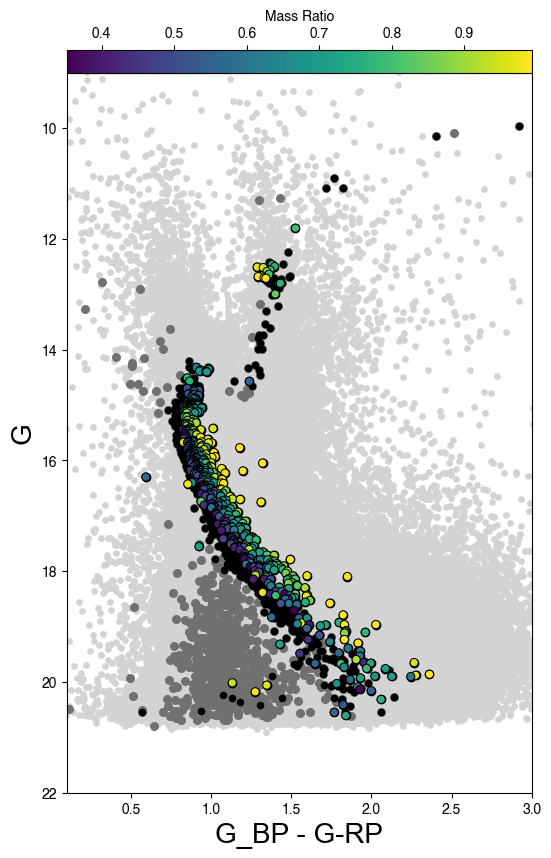

In [93]:
photMems = df.loc[df['member']]
photBinary = df.loc[df['binary']]


r = photBinary['qMedian']
f, ax = plt.subplots(figsize=(6,11))

ax.set_xlabel('G_BP - G-RP',fontsize=20, font='arial')
ax.set_ylabel('G',fontsize=20,font='arial')
#plot phot and cluster members
plt.scatter((originalGaia['phot_bp_mean_mag'] - originalGaia['phot_rp_mean_mag']), originalGaia['phot_g_mean_mag'],s=15, color='lightgray',label='Sample From Gaia')
plt.scatter(df['G_BP'] - df['G_RP'], df['G'],s=30, color='#707070',label='Gaia Cluster Members')
plt.scatter(photMems['G_BP'] - photMems['G_RP'], photMems['G'],s=20, color='#000000',label='Gaia+BASE9 Cluster Members')
plt.scatter(photBinary['G_BP'] - photBinary['G_RP'], photBinary['G'], color='#000000')
ax.set_xlim(0.1, 3)
ax.set_ylim(22,9)


#plot colorbar
plt.scatter(photBinary['G_BP'] - photBinary['G_RP'], photBinary['G'], s=35, c=r, cmap=plt.cm.get_cmap("viridis"),edgecolors= "black",linewidth=0.75,label='Identified Binaries')

plt.colorbar(label="Mass Ratio", orientation="horizontal",pad=0,location='top')


#overplot isochrone
#photfile = ph
#cmdfile = r"C:/Users/erinm/BASE9_utils/getGaiaData/M35.ms"
#mag       = 'G'
#color     = 'G_BP-G_RP'.split('-')
    
    
#header   = np.loadtxt(cmdfile,max_rows=1,dtype=str)
#yplot     = np.where(header == mag)[0][0]
#color1    = np.where(header == color[0])[0][0]
#color2    = np.where(header == color[1])[0][0]
#data = np.loadtxt(cmdfile,skiprows=1)
#ymag    = data[:,yplot]
#color   = data[:,color1] - data[:,color2]
#plt.plot(color, ymag, color='red',linewidth=1,label='Isochrone')
#plt.legend(loc="upper right",edgecolor='black')
#plt.show()
#plt.savefig('M35MegaCMD_paper.pdf',dpi=300, bbox_inches="tight")

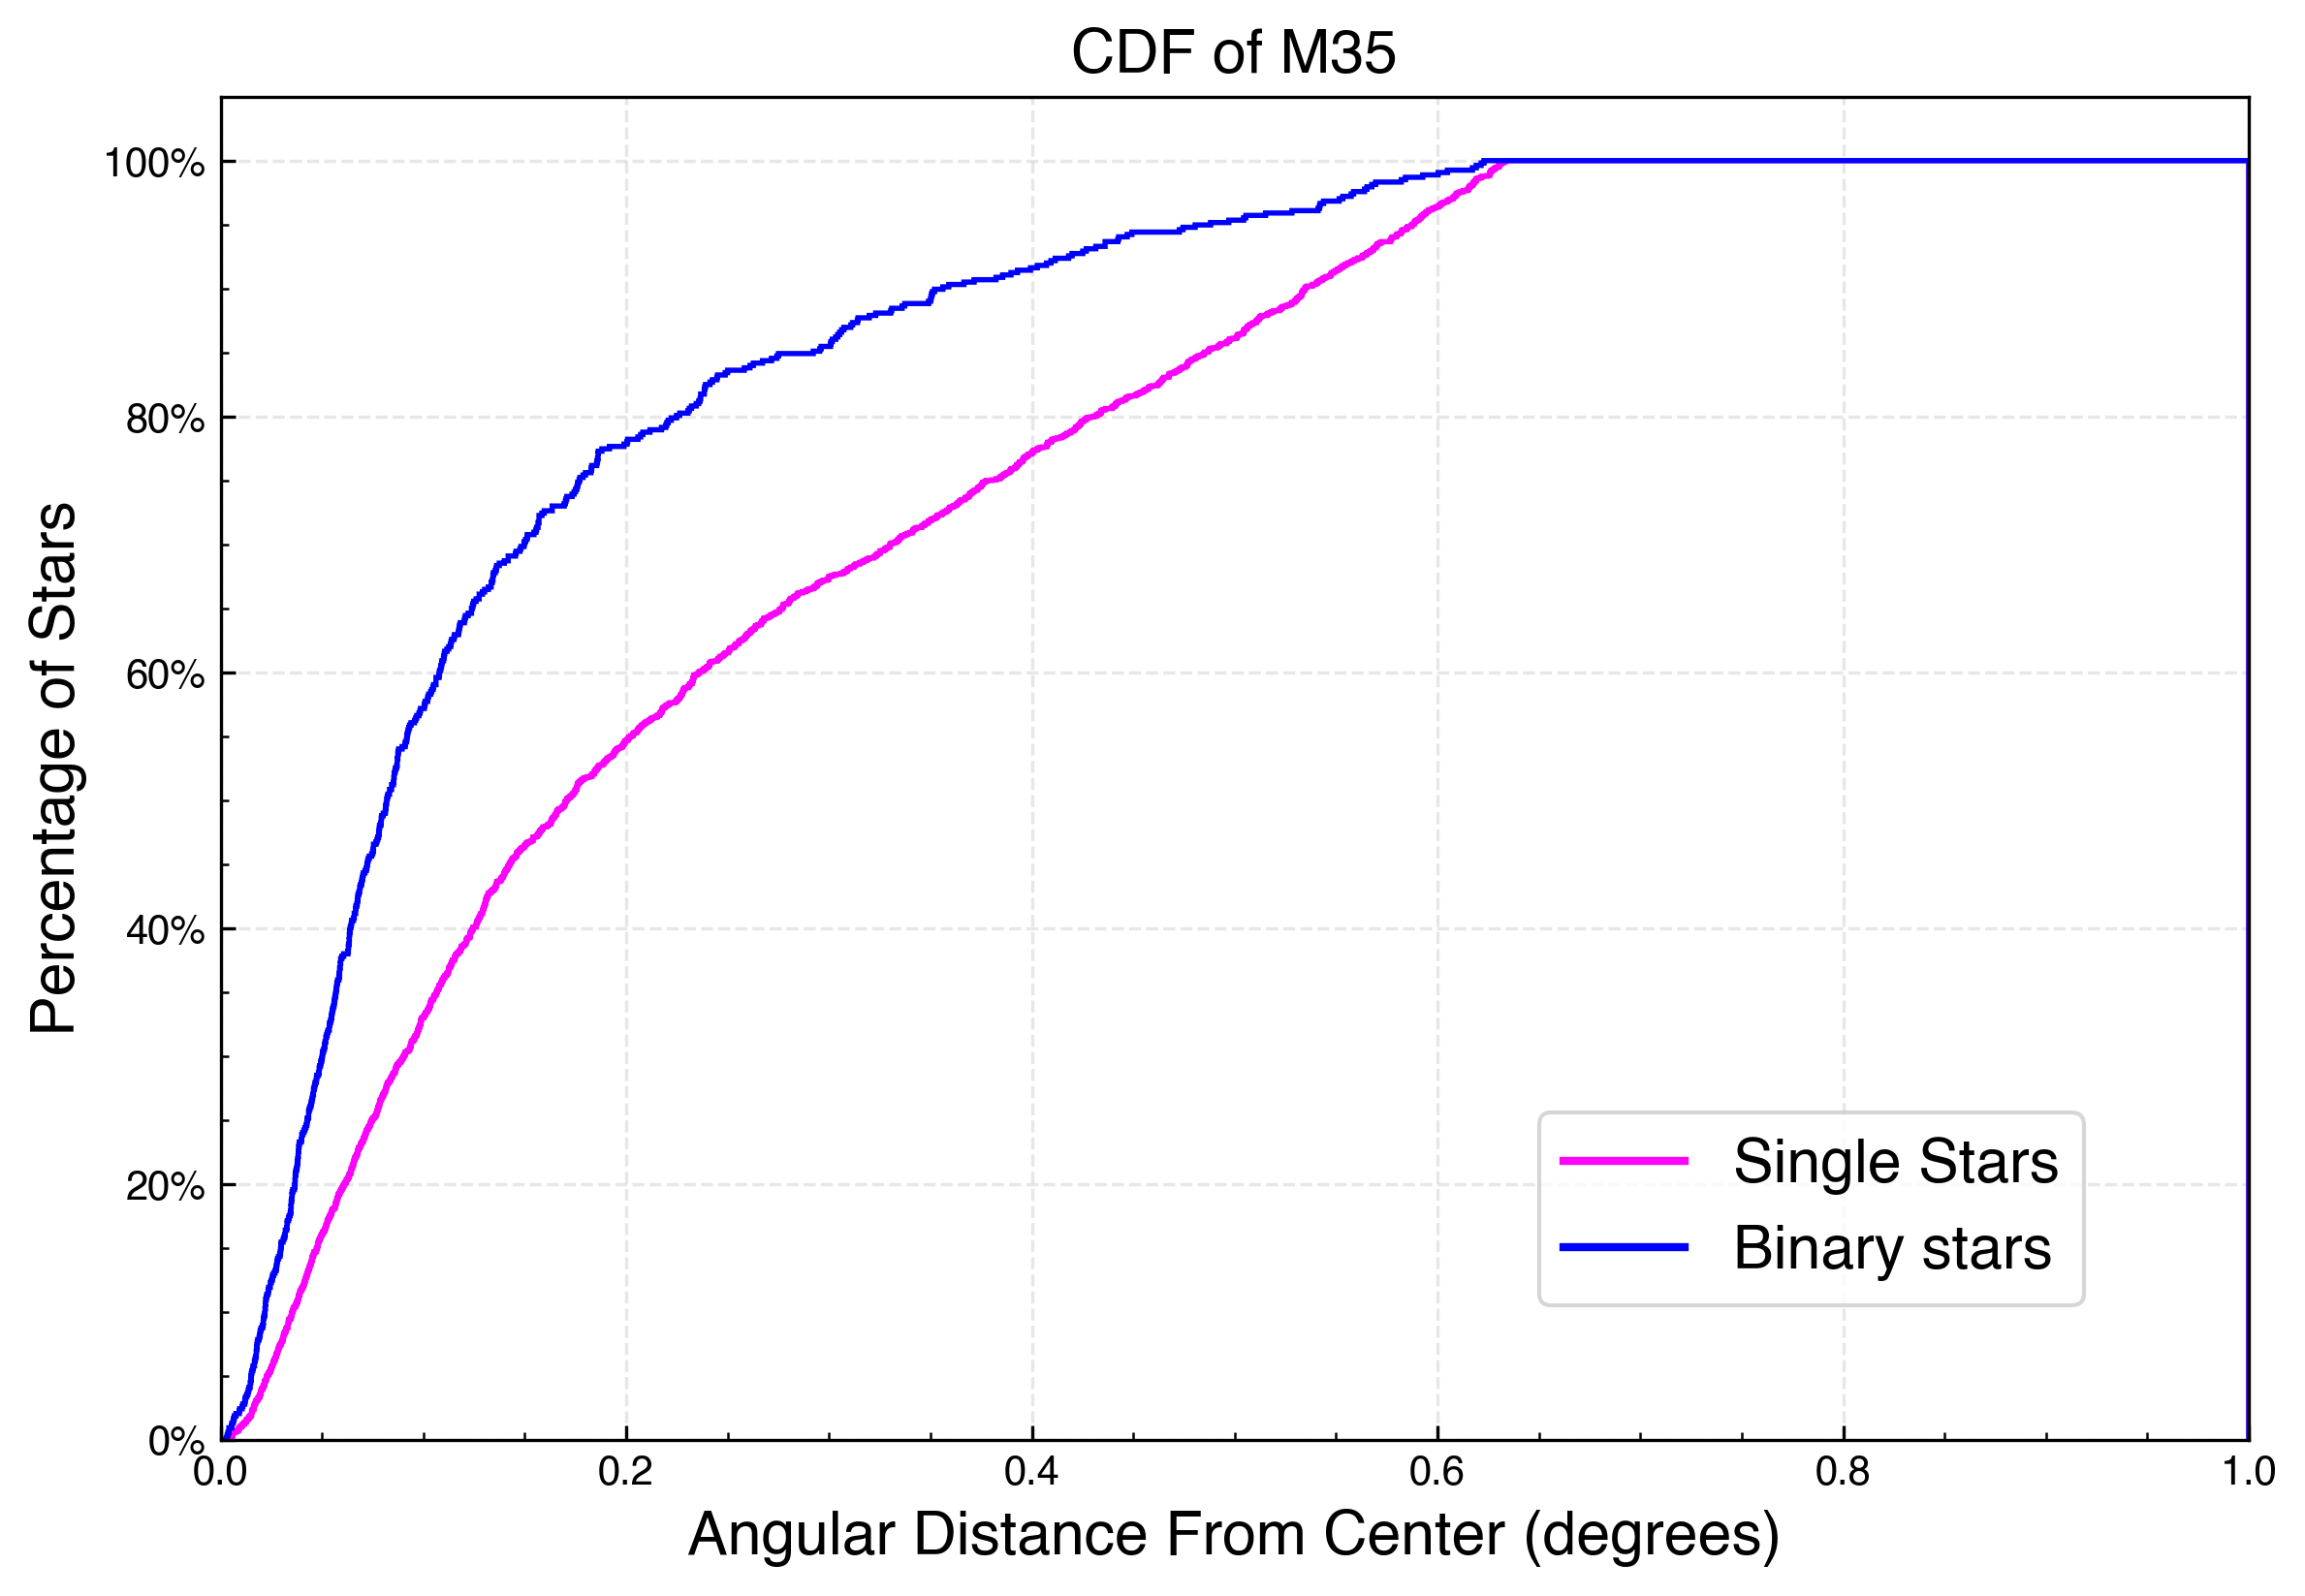

In [94]:
f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)


#alll = df['distance']
single2 = single['distance']
binary2 = binary['distance']



#allSample = alll.shape[0]
singleSample = single2.shape[0]
binarySample= binary2.shape[0]

#ax.hist(alll, cumulative = True, density = True, histtype = "step", bins = 10000, color='black',range=(0,1),linewidth=1.3)
ax.hist(single2, cumulative = True, density = True, histtype = "step", bins = 10000,color='#fa04fa',range=(0,1),linewidth=1.3)
ax.hist(binary2, cumulative = True, density = True, histtype = "step", bins = 10000,color='b',range=(0,1),linewidth=1.3)
#ax.hist(binarycut2, cumulative = True, density = True, histtype = "step", bins = 500,color='b')


#ks_result, twoside_pvalue = ks_2samp(binarycut1,binarycut2)
#ks_result, less_pvalue = ks_2samp(binarycut1,binarycut2,alternative='less')
#print(twoside_pvalue)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=15)
plt.ylabel("Percentage of Stars", fontsize=15)
plt.title("CDF of M35", fontsize=15)
#plt.text(.02, .85, f'K-S "two-sided" P-value: {twoside_pvalue:.7f}\nK-S "less" P-value: {less_pvalue:.7f}\nSingle sample: {singleSample}\nBinarylow sample: {binarySamplecut1}\nBinaryhigh sample: {binarySamplecut2}', fontsize = 10, 
        # bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
custom_lines = [ Line2D([0], [0], color='#fa04fa',alpha=1, lw=2, ls='-'), Line2D([0], [0], color='b',alpha=1, lw=2, ls='-')]
plt.grid(linestyle='--', alpha=0.3)
plt.legend(custom_lines, ['Single Stars','Binary stars'],loc=(.65,.1), fontsize=15)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,1)
#plt.show()
plt.savefig('M35CDF_paper.pdf',dpi=300, bbox_inches="tight")

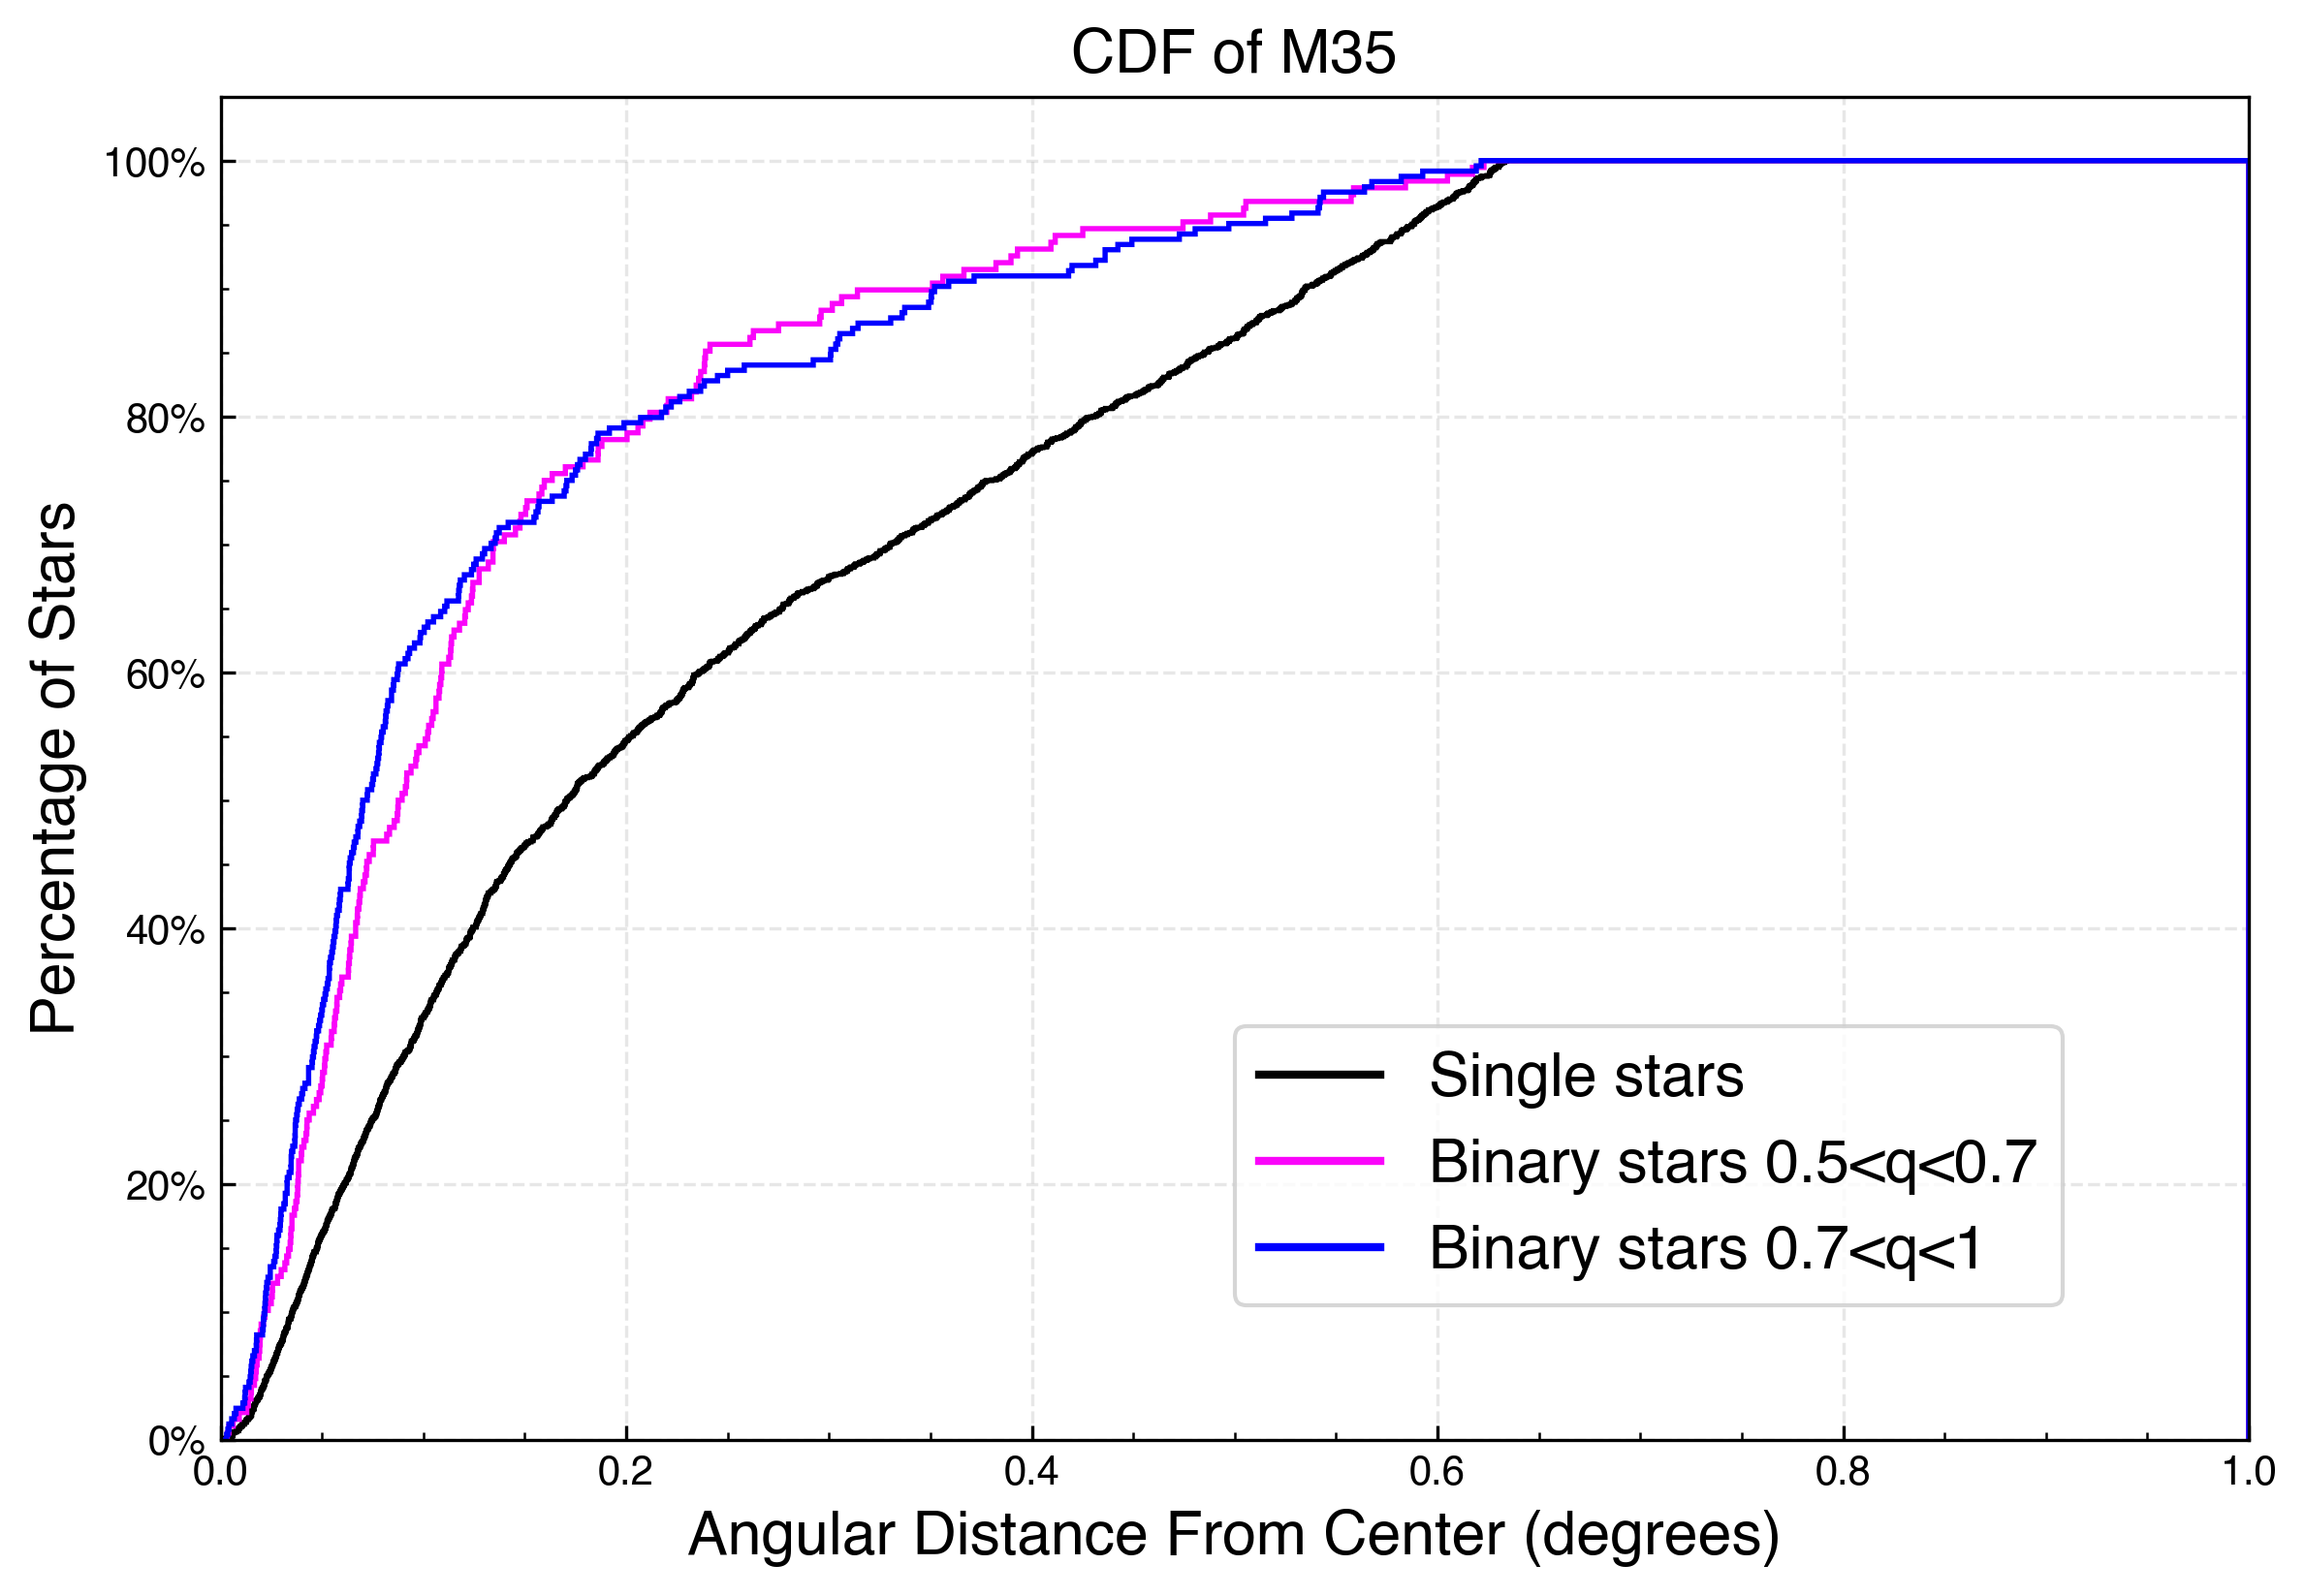

In [95]:

f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)


single2 = single['distance']
binarycut1_ = binarycut1['distance']
binarycut2_ = binarycut2['distance']



singleSample = single.shape[0]
binarySamplecut1 = binarycut1.shape[0]
binarySamplecut2= binarycut2.shape[0]

ax.hist(single2, cumulative = True, density = True, histtype = "step", bins = 10000, color='black',range=(0,1),linewidth=1.3)
ax.hist(binarycut1_, cumulative = True, density = True, histtype = "step", bins = 10000,color='#fa04fa',range=(0,1),linewidth=1.3)
ax.hist(binarycut2_, cumulative = True, density = True, histtype = "step", bins = 10000,color='b',range=(0,1),linewidth=1.3)
#ax.hist(binarycut2, cumulative = True, density = True, histtype = "step", bins = 500,color='b')


#ks_result, twoside_pvalue = ks_2samp(binarycut2,binarycut1)
#ks_result, less_pvalue = ks_2samp(binarycut1,binarycut2,alternative='less')
#print(twoside_pvalue)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=15)
plt.ylabel("Percentage of Stars", fontsize=15)
plt.title("CDF of M35", fontsize=15)
#plt.text(.02, .85, f'K-S "two-sided" P-value: {twoside_pvalue:.7f}\nK-S "less" P-value: {less_pvalue:.7f}\nSingle sample: {singleSample}\nBinarylow sample: {binarySamplecut1}\nBinaryhigh sample: {binarySamplecut2}', fontsize = 10, 
        # bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
custom_lines = [ Line2D([0], [0], color='black',alpha=1, lw=2, ls='-'),
                                Line2D([0], [0], color='#fa04fa',alpha=1, lw=2, ls='-'), Line2D([0], [0], color='b',alpha=1, lw=2, ls='-')]
plt.grid(linestyle='--', alpha=0.3)
plt.legend(custom_lines, ['Single stars', 'Binary stars 0.5<q<0.7','Binary stars 0.7<q<1'],loc=(.5,.1), fontsize=15)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,1)
#plt.show()
plt.savefig('M35CDF_paper.pdf',dpi=300, bbox_inches="tight")

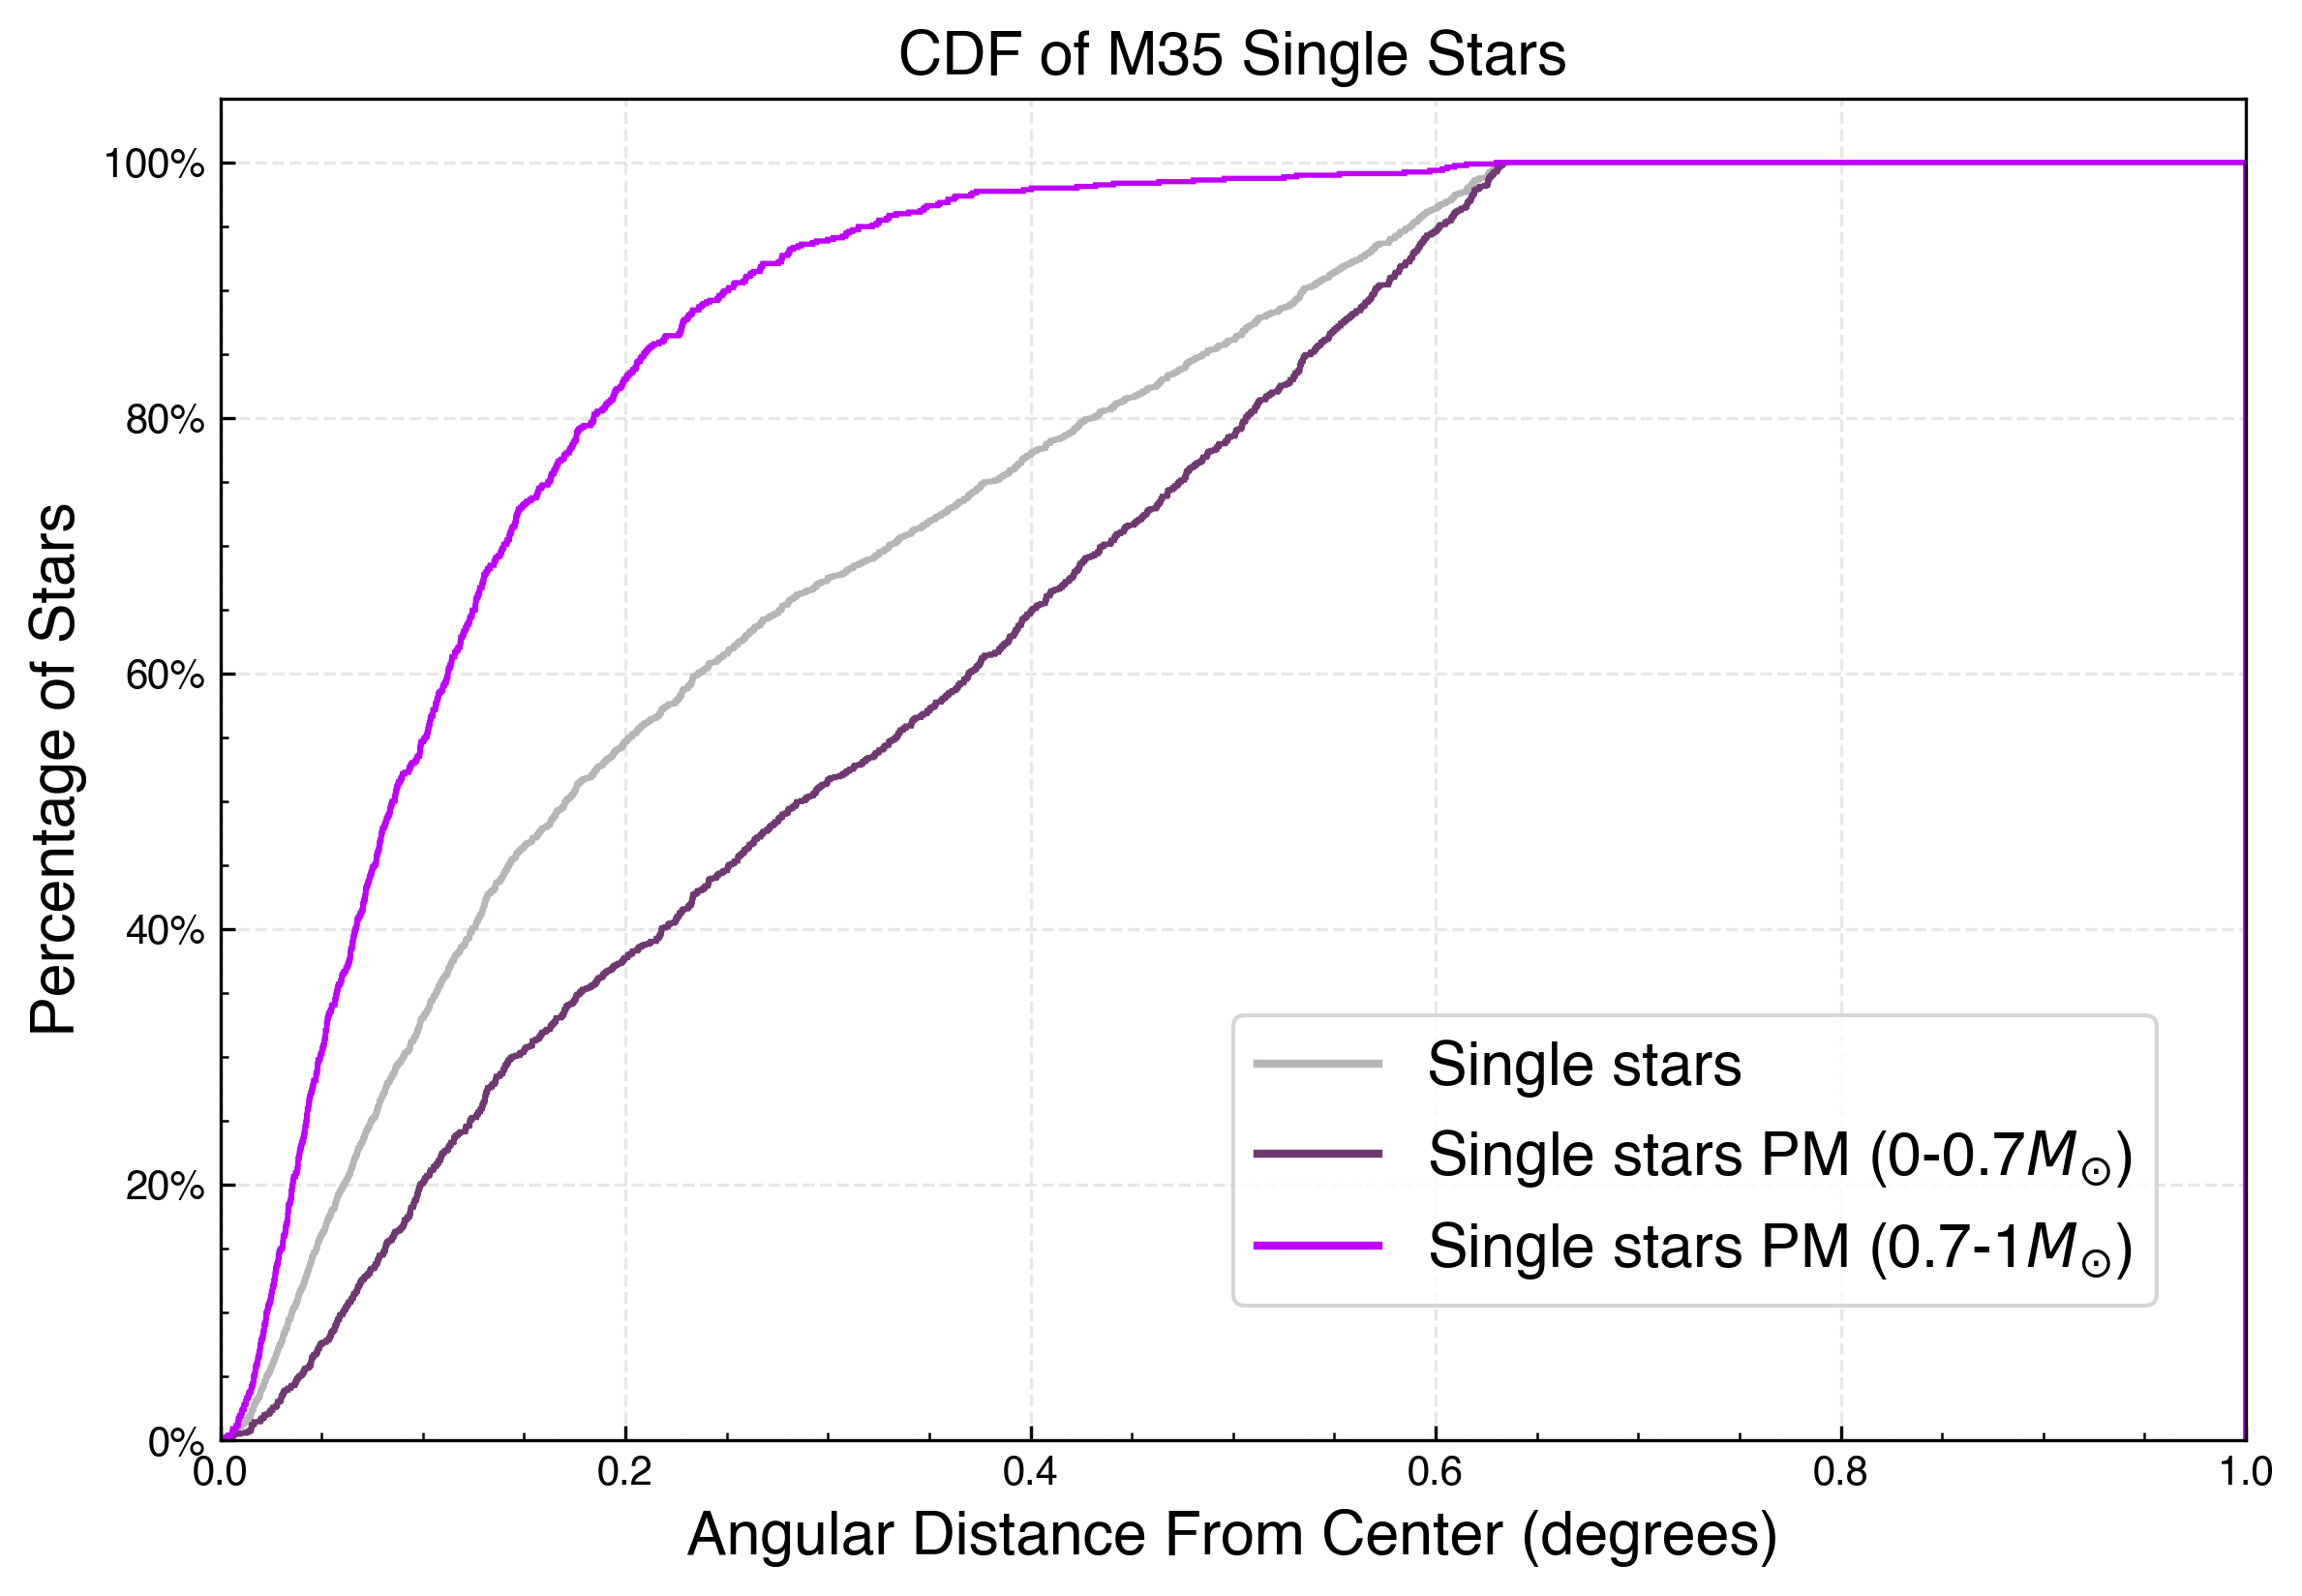

In [96]:
f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

single2 = single['distance']
singlecutPM1_ = singlecutPM1['distance']
singlecutPM2_ = singlecutPM2['distance']
#singlecutPM3_ = singlecutPM3['distance']
#singlecutPM4_ = singlecutPM4['distance']



singleSamplecut = single.shape[0]
singleSamplecutPM1= singlecutPM1_.shape[0]
singleSamplecutPM2= singlecutPM2_.shape[0]
#singleSamplecutPM3= singlecutPM3_.shape[0]
#singleSamplecutPM4= singlecutPM4_.shape[0]

ax.hist(single2, cumulative = True, density = True, histtype = "step", bins = 10000,color='#b7b5b7',range=(0,1),linewidth=1.3)
ax.hist(singlecutPM1_, cumulative = True, density = True, histtype = "step", bins = 10000,color='#713971',range=(0,1),linewidth=1.3)
ax.hist(singlecutPM2_, cumulative = True, density = True, histtype = "step", bins = 10000,color='#BE00FE',range=(0,1),linewidth=1.3)
#ax.hist(singlecutPM3_, cumulative = True, density = True, histtype = "step", bins = 10000,color='#fa04fa',range=(0,1),linewidth=1.3)
#ax.hist(singlecutPM4_, cumulative = True, density = True, histtype = "step", bins = 10000,color='b',range=(0,1),linewidth=1.3)

#ks_result, twoside_pvalue = ks_2samp(singlecutPM1,singlecutPM3)
#ks_result, less_pvalue = ks_2samp(singlecutPM1,singlecutPM3,alternative='less')
#print(twoside_pvalue)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=15)
plt.ylabel("Percentage of Stars", fontsize=15)
plt.title("CDF of M35 Single Stars", fontsize=15)
#plt.text(.02, .85, f'K-S "two-sided" P-value: {twoside_pvalue:.9f}\nK-S "less" P-value: {less_pvalue:.9f}\nsingle sample: {singleSamplecut}\nsinglecut1 sample: {singleSamplecutPM1}\nsinglecut2 sample: {singleSamplecutPM2}\nsinglecut3 sample: {singleSamplecutPM3}', fontsize = 8, 
       #  bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
custom_lines = [ Line2D([0], [0], color='#b7b5b7',alpha=1, lw=2, ls='-'),
                                Line2D([0], [0], color='#713971',alpha=1, lw=2, ls='-'),Line2D([0], [0], color='#BE00FE',alpha=1, lw=2, ls='-')]
plt.grid(linestyle='--', alpha=0.3)
plt.legend(custom_lines, ['Single stars', 'Single stars PM (0-0.7$M_{\odot}$)','Single stars PM (0.7-1$M_{\odot}$)'],loc=(.5,.1), fontsize=15)

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,1)
#plt.show()
plt.savefig('M35CDFSingle_paper.pdf',dpi=300, bbox_inches="tight")

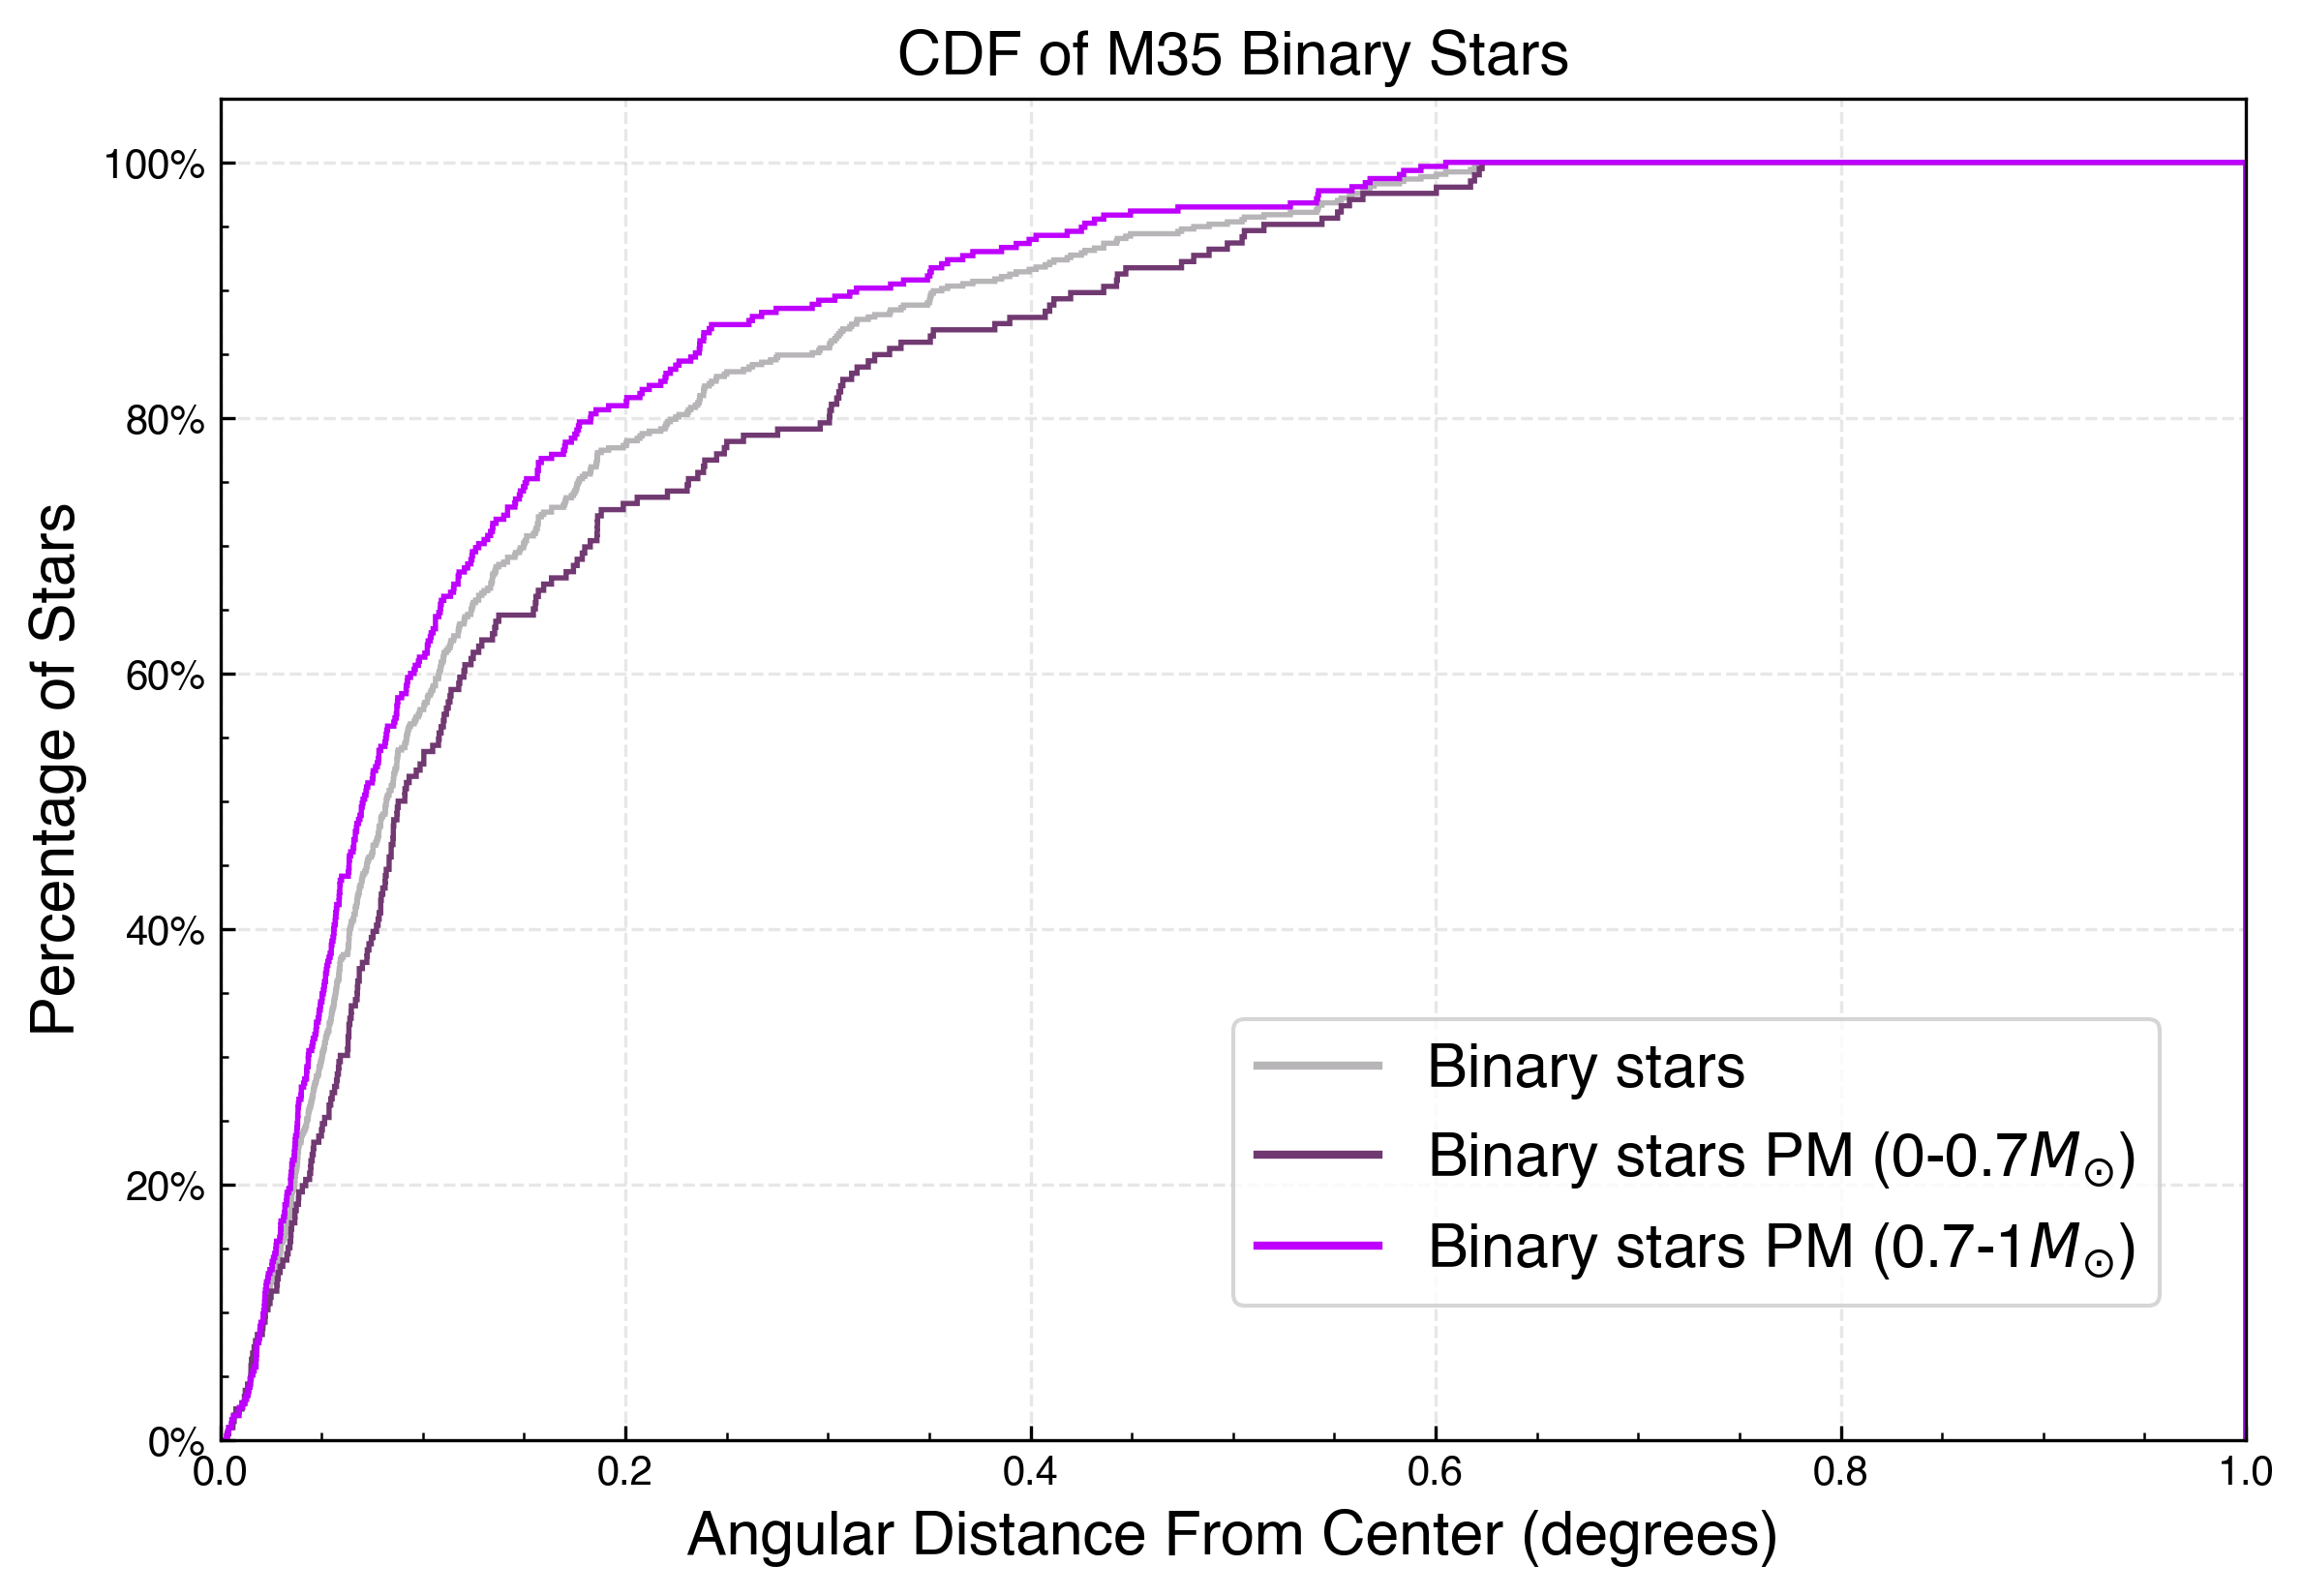

In [97]:
f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

binary2 = binary['distance']
binarycutPM1_ = binarycutPM1['distance']
binarycutPM2_ = binarycutPM2['distance']
#binarycutPM3_ = binarycutPM3['distance']



binarySamplecut = binary.shape[0]
binarySamplecutPM1= binarycutPM1_.shape[0]
binarySamplecutPM2= binarycutPM2_.shape[0]
#binarySamplecutPM3= binarycutPM3_.shape[0]

ax.hist(binary2, cumulative = True, density = True, histtype = "step", bins = 100000,color='#b7b5b7',range=(0,1),linewidth=1.3)
ax.hist(binarycutPM1_, cumulative = True, density = True, histtype = "step", bins = 100000,color='#713971',range=(0,1),linewidth=1.3)
ax.hist(binarycutPM2_, cumulative = True, density = True, histtype = "step", bins = 100000,color='#BE00FE',range=(0,1),linewidth=1.3)
#ax.hist(binarycutPM3_, cumulative = True, density = True, histtype = "step", bins = 100000,color='#fa04fa',range=(0,1),linewidth=1.3)


#ks_result, twoside_pvalue = ks_2samp(binarycutPM1,binarycutPM2)
#ks_result, less_pvalue = ks_2samp(binarycutPM2,binarycutPM3,alternative='less')
#print(twoside_pvalue,less_pvalue)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=15)
plt.ylabel("Percentage of Stars", fontsize=15)
plt.title("CDF of M35 Binary Stars", fontsize=15)
#plt.text(.02, .85, f' \nBinary sample: {binarySamplecut}\nbinarycut1 sample: {binarySamplecutPM1}\nbinarycut2 sample: {binarySamplecutPM2}\nbinarycut3 sample: {binarySamplecutPM3}', fontsize = 8, 
         #bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
custom_lines = [ Line2D([0], [0], color='#b7b5b7',alpha=1, lw=2, ls='-'),
                                Line2D([0], [0], color='#713971',alpha=1, lw=2, ls='-'),Line2D([0], [0], color='#BE00FE',alpha=1, lw=2, ls='-')]
plt.grid(linestyle='--', alpha=0.3)
plt.legend(custom_lines, ['Binary stars', 'Binary stars PM (0-0.7$M_{\odot}$)','Binary stars PM (0.7-1$M_{\odot}$)'],loc=(.5,.1), fontsize=15)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,1)
#plt.show()
plt.savefig('M35CDFBinary_paper.pdf',dpi=300, bbox_inches="tight")

NameError: name 'merged_Frame' is not defined

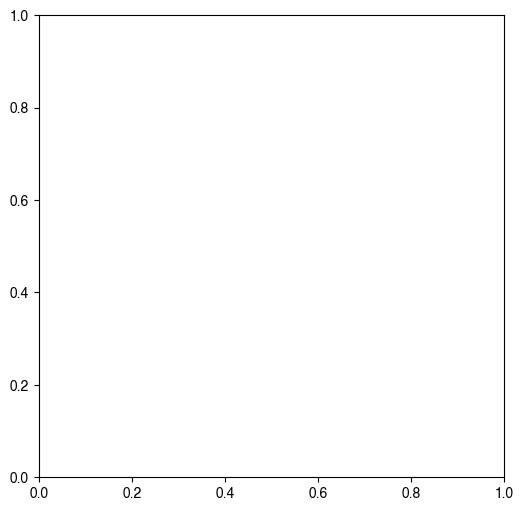

In [98]:
f,ax = plt.subplots(figsize=(6,6))
r = merged_Frame['qMedian']
plt.scatter(merged_Frame['distance'], merged_Frame['m1Median'], c=r,cmap=plt.cm.get_cmap("viridis"), s=50,edgecolors= "black",linewidth=0.75,)
plt.colorbar(label="Mass Ratio", orientation="horizontal",pad=0,location='top')
plt.xlabel('Distance (degrees)', fontsize=15)
plt.ylabel('Primary Mass (M$\odot$)',fontsize=15)


(0.2, 3.5)

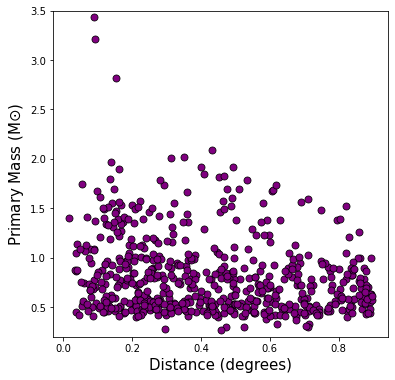

In [ ]:
f,ax = plt.subplots(figsize=(6,6))
plt.scatter(merged_Frame_single['distance'], merged_Frame_single['m1Median'],color='purple',edgecolors= "black",s=50,linewidth=0.75)
plt.xlabel('Distance (degrees)', fontsize=15)
plt.ylabel('Primary Mass (M$\odot$)',fontsize=15)

ax.set_ylim(0.2,3.5)

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

filename = sys.argv[1] 
rootname = os.path.splitext('/Users/Claire/Documents/Code/current/ANNACRNN/NGC_6819.res')[0]


# load the data into arrays
data    = np.loadtxt('/Users/Claire/Documents/Code/current/ANNACRNN/NGC_6819.res',skiprows=1,usecols=[0,1,2,3,5])
age_all = data[:,0]
feh_all = data[:,1]
dis_all = data[:,2]
av_all  = data[:,3]
stage   = data[:,4]

# only read from main run (don't plot burn in)
ind    = np.where(stage == 3)

dis    = dis_all[ind]
av     = av_all[ind]
i      = list(range(0,len(dis),1)) # iteration number

# calculate stats
avg_dis = np.average(dis)     ; std_dis = np.std(dis)
a = '%.3f' % avg_dis ; s = '%.4f' % std_dis ; dis_lab = a+' +/- '+s
avg_av  = np.average(av)      ; std_av  = np.std(av)
a = '%.4f' % avg_av  ; s = '%.4f' % std_av  ; av_lab  = a+' +/- '+s
# display results to screen
print(avg_dis,avg_av)


12.371411487800001 0.49574187219999993


In [103]:
photMems

,Unnamed: 0,source_id,ra,dec,pmra,pmdec,radial_velocity,G,phot_g_mean_flux_over_error,G_BP,...,PPa,PPM,PM_ra,PM_dec,CMprior,member,binary,m1Median,qMedian,distance
0,0,2076299826416438016,295.323348,40.178309,-2.752032,-3.855960,3.261106,9.964309,789.751465,11.636763,...,1.0,1.0,1.0,1.0,1.00,True,False,1.571696,0.018586,0.011759
2,2,2076582950658667264,295.284268,40.325501,-2.808784,-3.858384,2.089507,10.142780,1728.030518,11.429246,...,1.0,1.0,1.0,1.0,1.00,True,False,1.598359,0.022048,0.139020
3,3,2076583534763920896,295.332116,40.393369,-2.914508,-3.941675,1.359580,10.906358,4438.817383,11.769193,...,1.0,1.0,1.0,1.0,1.00,True,False,1.598426,0.017469,0.203442
4,4,2076299826420536320,295.321034,40.181053,-2.853334,-3.896847,0.901455,11.078962,4430.854004,11.966545,...,1.0,1.0,1.0,1.0,1.00,True,False,1.569861,0.051767,0.009446
5,5,2076394659297111552,295.393296,40.296703,-2.750052,-3.962137,2.557951,11.088031,4608.468750,11.919096,...,1.0,1.0,1.0,1.0,1.00,True,False,1.598236,0.031725,0.118756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2634,2076294775535176576,295.357629,40.014040,-2.765099,-4.239604,NaN,20.543865,144.981918,20.313747,...,0.5,1.0,1.0,1.0,0.25,True,False,0.586420,0.168346,0.177721
2635,2635,2076596763263755136,295.381096,40.662619,-3.033282,-3.783025,NaN,20.548653,142.204727,21.356173,...,1.0,1.0,1.0,1.0,0.50,True,True,0.570689,0.566931,0.474544
2637,2637,2076296562240885632,295.288473,40.044859,-3.108932,-3.987903,NaN,20.549713,147.411377,21.496828,...,0.5,1.0,1.0,1.0,0.25,True,False,0.580220,0.087813,0.147805
2641,2641,2076298280232229504,295.300573,40.071184,-2.768250,-4.211686,NaN,20.556036,132.030457,NaN,...,0.5,1.0,1.0,1.0,0.25,True,True,0.523342,0.962152,0.120275


In [104]:
#calculate half-mass radius
#50% of stars are within 0.4 degrees of cluster center from first hist
import math
d= 10**((avg_dis+5-avg_av)/5)
r_deg= 0.4 #better way to grab this value directly from hist?
r=r_deg*3600
R_half_pc=r*d/206265 #seems bigger than literature values, but maybe becasue we are going out further?
R_half_m=R_half_pc*3.086*10**16
#R_core= 6.5 arcmin
#1.305*R
#calculate half-mass relaxation time

#phothalfmass = merged_Frame_all.loc[(merged_Frame_all['distance'] < 0.4) ]

#calculate total mass
photMems['m2Median']= (photMems['m1Median'] * photMems['qMedian'])
mass1=sum(photMems['m1Median'])
mass2=sum(photMems['m2Median'])
mass_tot=(mass1+mass2)
M=(mass1+mass2)*1.9891*10**30
G=6.67*10**-11
N=len(photMems)
const=0.1
t_rh=(((0.17*N)/np.log(const*N))*(math.sqrt(((R_half_m)**3)/(G*M))))/31536000

#calculate the mass segregation time for the most massive star

#calculate max m and avg m 
avg_m = (mass_tot/(len(photMems)*2))*1.9891*10**30
m_max= max(photMems['m1Median'])*1.9891*10**30

t_seg= (avg_m/m_max)*t_rh

print(t_rh,R_half_pc,M, d,t_seg)


1199457263.3843148 16.560401966129444 5.196495141014633e+33 2372.1050774608957 522218055.55743724


/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_16294/3247375245.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  photMems['m2Median']= (photMems['m1Median'] * photMems['qMedian'])


In [105]:
minmag =min(photMems['G'])
maxmag = max(photMems['G'])
print(minmag, maxmag)

9.964308738708496 20.60531616210937
